In [28]:
# import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [29]:
# initialize X, Y, Total no of classes in the given data set i.e, 43

X = []
Y = []
total_classes = 43
curr_directory = os.getcwd() # this variable holds the absolute path of the project file

In [30]:
# traverse through all the classes and resize the images to a fixed size of 30x30, we use PIL library for this

for index in range(total_classes):
    path = os.path.join(curr_directory, 'train', str(index))
    images = os.listdir(path)
    
    for img in images:
        try:
            image = Image.open(path + '/' + img)
            image = image.resize((30,30))
            image = np.array(image)

            X.append(image) # we append the data and label in the X and Y lists respectively
            Y.append(index)
        
        except:
            print("Error loading image")
                    
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


In [31]:
# split the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print("Shape of training data : x_train: ", x_train.shape, " and y_train: ", y_train.shape)
print("Shape of testing data : x_test: ", x_test.shape, " and y_test: ", y_test.shape)

# one hot encoding the labels

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of training data : x_train:  (31367, 30, 30, 3)  and y_train:  (31367,)
Shape of testing data : x_test:  (7842, 30, 30, 3)  and y_test:  (7842,)


In [32]:
# define the model architecture

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
# fit the model to the data

epochs = 15
history = model.fit(x_train, y_train, batch_size = 64, epochs = epochs, validation_data = (x_test, y_test))
model.save('traffic_recognition.h5') # save the model

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 76s 2ms/step - loss: 2.5243 - accuracy: 0.4050 - val_loss: 0.6202 - val_accuracy: 0.8520
Epoch 2/15
31367/31367 [==============================] - 70s 2ms/step - loss: 0.8450 - accuracy: 0.7551 - val_loss: 0.3280 - val_accuracy: 0.9185
Epoch 3/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.5173 - accuracy: 0.8474 - val_loss: 0.1702 - val_accuracy: 0.9495
Epoch 4/15
31367/31367 [==============================] - 72s 2ms/step - loss: 0.3934 - accuracy: 0.8806 - val_loss: 0.1145 - val_accuracy: 0.9704
Epoch 5/15
31367/31367 [==============================] - 76s 2ms/step - loss: 0.2848 - accuracy: 0.9141 - val_loss: 0.0904 - val_accuracy: 0.9762
Epoch 6/15
31367/31367 [==============================] - 78s 2ms/step - loss: 0.2437 - accuracy: 0.9298 - val_loss: 0.0526 - val_accuracy: 0.9876
Epoch 7/15
31367/31367 [==============================] - 73s 2ms/ste

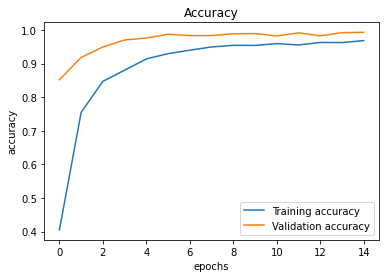

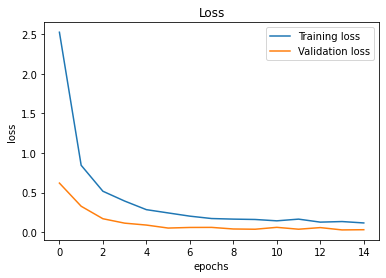

In [34]:
# plot the accuracy graph

plt.figure(0)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# plot the loss graph

plt.figure(1)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend() 

In [40]:
# test the model

from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')
labels = y_test['ClassId'].values
img_paths = y_test['Path'].values

test_data = []

for path in img_paths:
    image = Image.open(path)
    image = image.resize((30,30))
    test_data.append(np.array(image))
    
test_data = np.array(test_data)
pred = model.predict_classes(test_data)

print('Accuracy on test data: ', accuracy_score(labels, pred)*100, '%')

Accuracy on test data:  97.26049089469517 %
